In [1]:
#importing the necessary packages 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the boston dataset used in R
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

#making it a  pandas df
boston_df = boston.frame

#xploring the first 5 items to check if it was imported correctly
boston_df.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Model 1 (Living space)

In [3]:
# importing the correct packages 
from statsmodels.formula.api import ols

In [4]:
# formula construction 
ols_formula = "MEDV ~ RM"

#data construction 
ols_data = boston_df[["MEDV", "RM"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           2.49e-74
Time:                        07:20:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

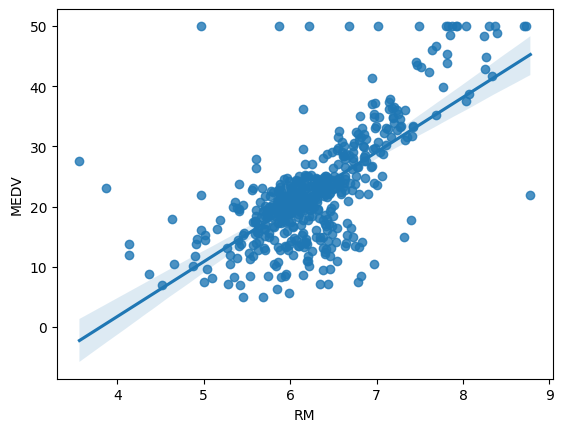

In [5]:
# using the regplot to visualize the regression line 
sns.regplot(x="RM", y="MEDV", data=ols_data)

#showing the plot
plt.show()

In [6]:
#subsetting the x variable of Model 1
X = ols_data["RM"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

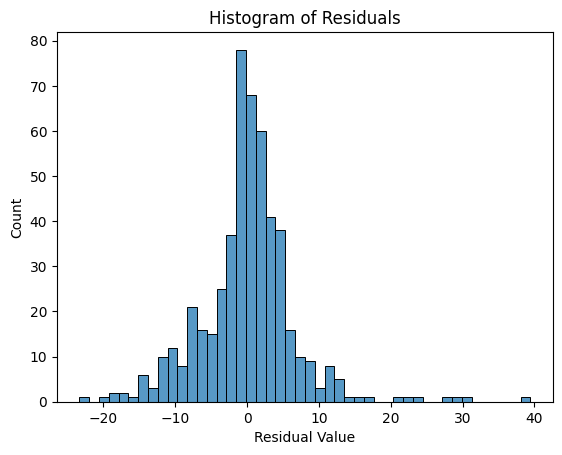

In [7]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

In [8]:
# using another exploratory data analysis tool to check for normality of residuals using quantile-quantile plot
#importing the necessary package
import statsmodels.api as sm

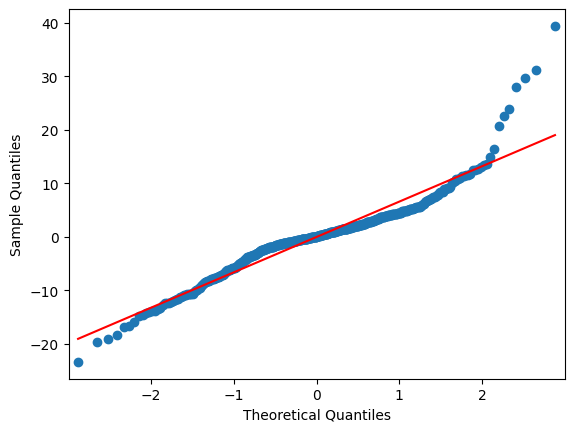

In [9]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

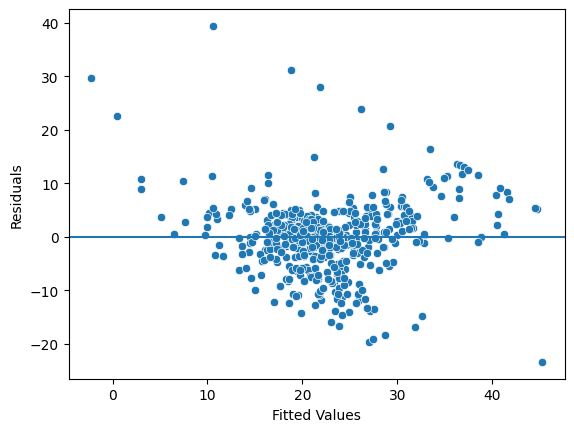

In [10]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

### Model evaluation

In [11]:
#importing necessary packages from scikit learn 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
Y = ols_data["MEDV"]

#RMSE calc
model_rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=fitted_values))

#MAD OR MAE
model_mae = mean_absolute_error(y_true=Y, y_pred=fitted_values)

#empty list 
evaluation_results = []
evaluation_results.append(model_rmse)
evaluation_results.append(model_mae) 

#putting them in a pd dataframe 
evaluation = pd.DataFrame({"Eval_metrics":evaluation_results}, index= ["RMSE","MAE"])

#PRINTING
evaluation

,Eval_metrics
RMSE,6.603071
MAE,4.447773


## Model 2 (Neighborhood social economic status)

In [13]:
# formula construction 
ols_formula = "MEDV ~ LSTAT"

#data construction 
ols_data = boston_df[["MEDV", "LSTAT"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           5.08e-88
Time:                        07:20:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

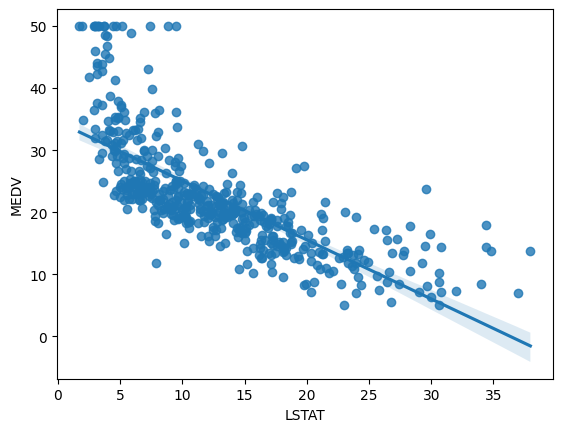

In [14]:
# using the regplot to visualize the regression line 
sns.regplot(x="LSTAT", y="MEDV", data=ols_data)

#showing the plot
plt.show()

In [15]:
#subsetting the x variable of Model 1
X = ols_data["LSTAT"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

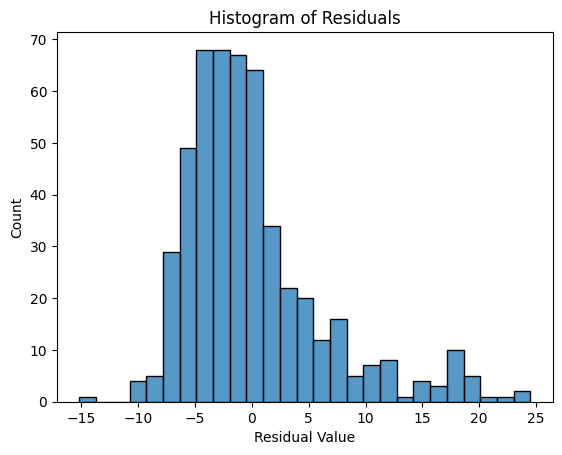

In [16]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

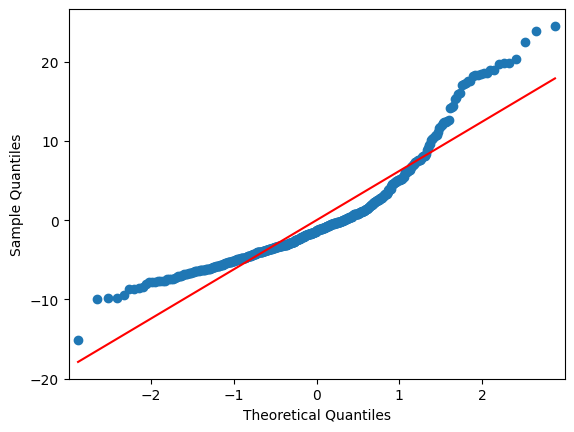

In [17]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

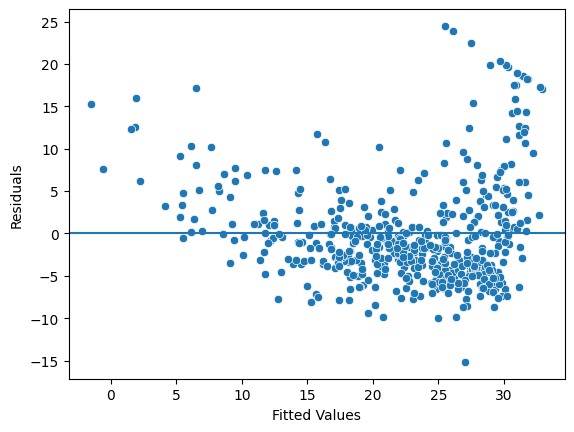

In [18]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

### MODEL EVALUATION

In [19]:
Y = ols_data["MEDV"]

#RMSE calc
model_rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=fitted_values))

#MAD OR MAE
model_mae = mean_absolute_error(y_true=Y, y_pred=fitted_values)

#empty list 
evaluation_results = []
evaluation_results.append(model_rmse)
evaluation_results.append(model_mae) 

#putting them in a pd dataframe 
evaluation = pd.DataFrame({"Eval_metrics":evaluation_results}, index= ["RMSE","MAE"])

#PRINTING
evaluation

,Eval_metrics
RMSE,6.203464
MAE,4.505281


## Model 3 (Education and Public Services)


In [20]:
# formula construction 
ols_formula = "MEDV ~ PTRATIO"

#data construction 
ols_data = boston_df[["MEDV", "PTRATIO"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.61e-34
Time:                        07:20:46   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

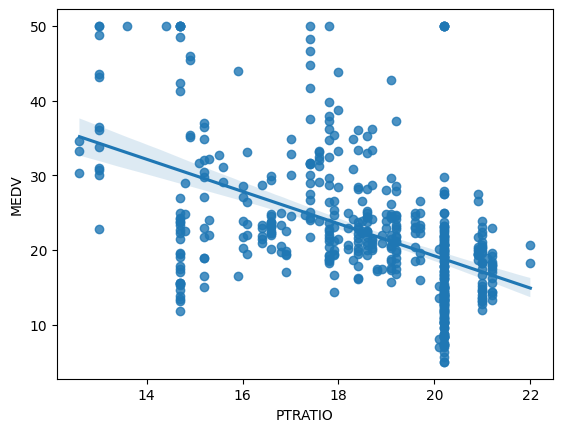

In [21]:
# using the regplot to visualize the regression line 
sns.regplot(x="PTRATIO", y="MEDV", data=ols_data)

#showing the plot
plt.show()

In [22]:
#subsetting the x variable of Model 1
X = ols_data["PTRATIO"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

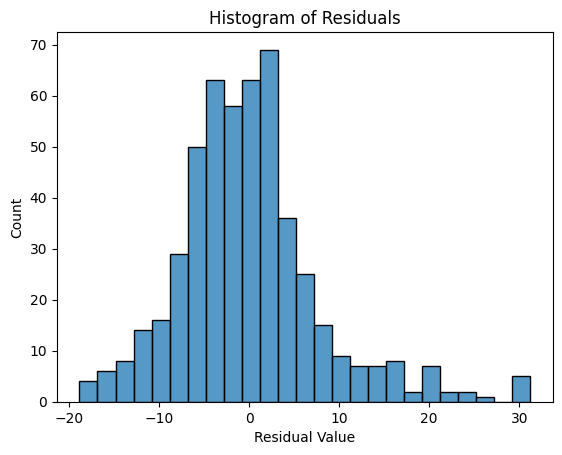

In [23]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

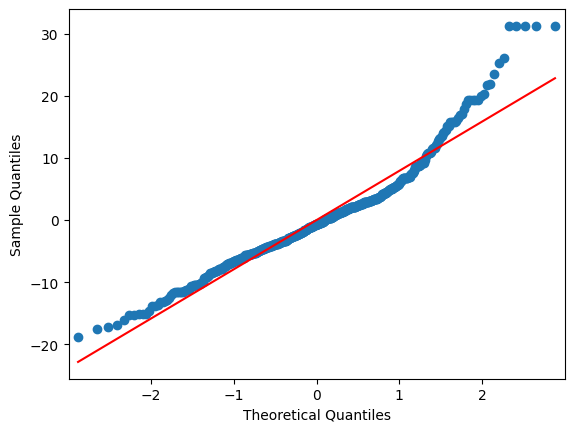

In [24]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

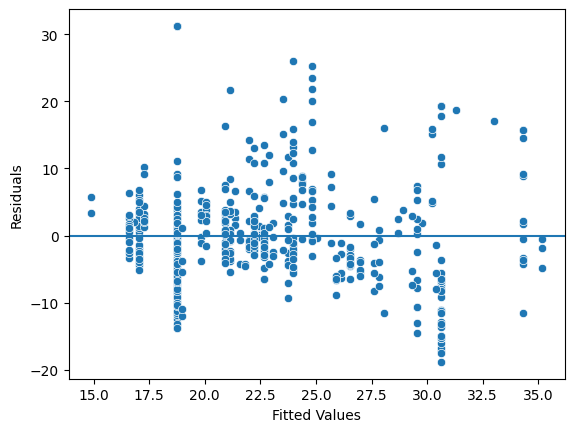

In [25]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

In [26]:
Y = ols_data["MEDV"]

#RMSE calc
model_rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=fitted_values))

#MAD OR MAE
model_mae = mean_absolute_error(y_true=Y, y_pred=fitted_values)

#empty list 
evaluation_results = []
evaluation_results.append(model_rmse)
evaluation_results.append(model_mae) 

#putting them in a pd dataframe 
evaluation = pd.DataFrame({"Eval_metrics":evaluation_results}, index= ["RMSE","MAE"])

#PRINTING
evaluation

,Eval_metrics
RMSE,7.915314
MAE,5.774082


## Model 4 (Environmental Quality and Health)

In [27]:
# formula construction 
ols_formula = "MEDV ~ NOX"

#data construction 
ols_data = boston_df[["MEDV", "NOX"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           7.07e-24
Time:                        07:20:46   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.000      37.787      44.904
NOX          -33.9161      3.196    -10.611      0.000     -40.196     -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

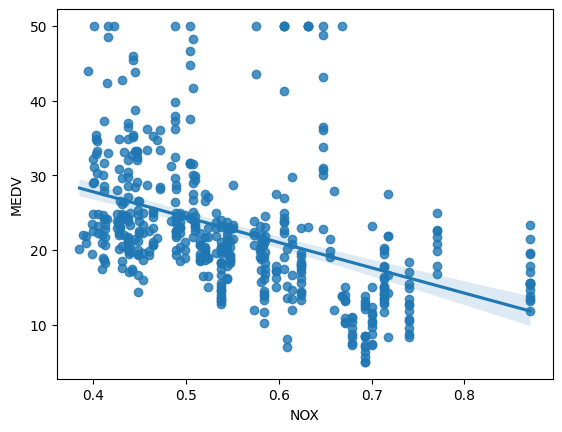

In [28]:
# using the regplot to visualize the regression line 
sns.regplot(x="NOX", y="MEDV", data=ols_data)

#showing the plot
plt.show()

In [29]:
#subsetting the x variable of Model 1
X = ols_data["NOX"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

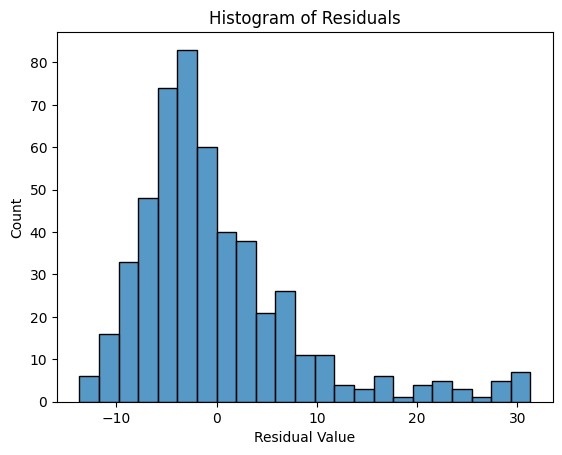

In [30]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

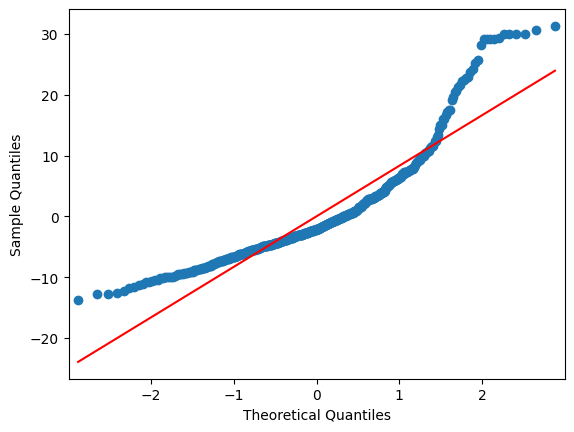

In [31]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

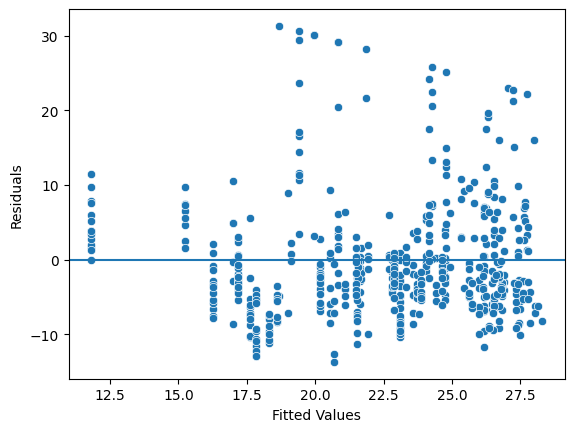

In [32]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

## Model 5 (Accessibility and Commute)

In [33]:
# formula construction 
ols_formula = "MEDV ~ DIS"

#data construction 
ols_data = boston_df[["MEDV", "DIS"]]

#OLS 
OLS = ols(formula=ols_formula, data=ols_data)

#fitting the model 
model = OLS.fit()

#model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        07:20:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

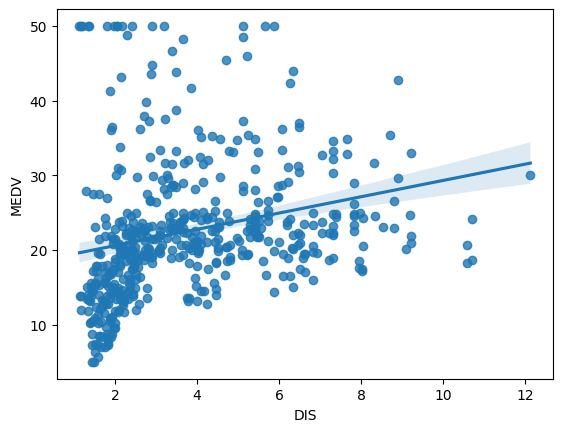

In [34]:
# using the regplot to visualize the regression line 
sns.regplot(x="DIS", y="MEDV", data=ols_data)

#showing the plot
plt.show()

In [35]:
#subsetting the x variable of Model 1
X = ols_data["DIS"]

#Getting the predictions from the model 
fitted_values = model.predict(X)

#calculating residuals 
residuals = model.resid

### Checking the assumption of normality 

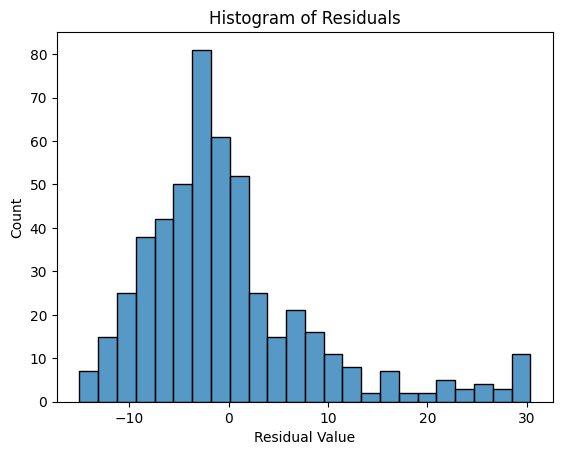

In [36]:
# checking the normality assumption by plotting the histogram of the residuals 
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value") # setting x label for the histplot
fig.set_title("Histogram of Residuals")
plt.show()

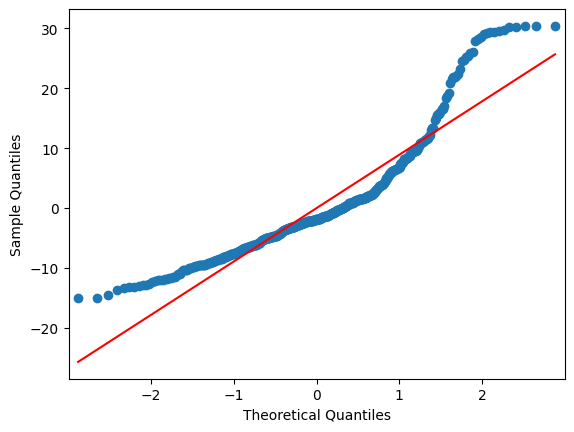

In [37]:
#plotting the quantile-quantile plot 
fig = sm.qqplot(model.resid, line='s')
plt.show()

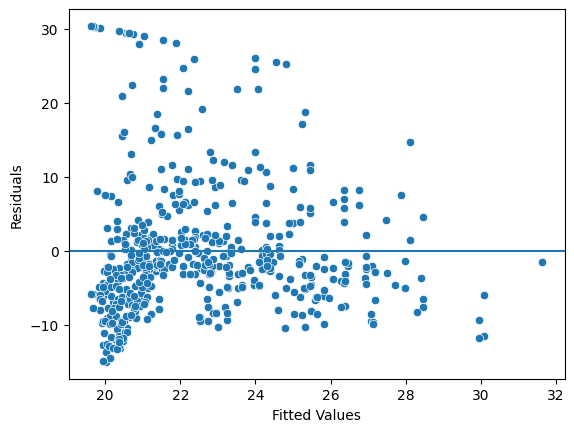

In [38]:
#checking for homoscedacity using residuals and fitted values by creating a scatterplot
fig = sns.scatterplot(x=fitted_values, y=residuals)

#adding a line or reference at residuals = 0 
fig.axhline(0)

#setting x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

#displaying the plot
plt.show()

In [39]:
Y = ols_data["MEDV"]

#RMSE calc
model_rmse = np.sqrt(mean_squared_error(y_true=Y, y_pred=fitted_values))

#MAD OR MAE
model_mae = mean_absolute_error(y_true=Y, y_pred=fitted_values)

#empty list 
evaluation_results = []
evaluation_results.append(model_rmse)
evaluation_results.append(model_mae) 

#putting them in a pd dataframe 
evaluation = pd.DataFrame({"Eval_metrics":evaluation_results}, index= ["RMSE","MAE"])

#PRINTING
evaluation

,Eval_metrics
RMSE,8.896423
MAE,6.364831
